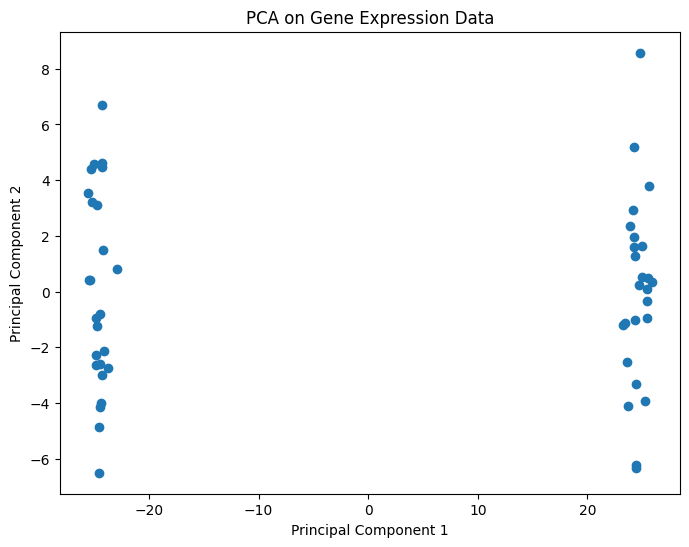

Explained Variance Ratio: [0.6057958  0.01156883]

Top 10 Genes Contributing to PC1 (by absolute loading):
Index(['Gene_840', 'Gene_514', 'Gene_894', 'Gene_783', 'Gene_681', 'Gene_857',
       'Gene_754', 'Gene_887', 'Gene_700', 'Gene_880'],
      dtype='object')


In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)  
num_genes = 1000
num_samples = 50
data = pd.DataFrame(np.random.randn(num_samples, num_genes), columns=[f"Gene_{i+1}" for i in range(num_genes)])

for i in range(num_samples // 2):
    data.iloc[i, :num_genes // 2] += 2  
    data.iloc[i + num_samples // 2, num_genes // 2:] += 3 



scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

pca = PCA(n_components=2) 
principal_components = pca.fit_transform(scaled_data)


pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Gene Expression Data')



plt.show()


explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(2)], index=data.columns) 

top_genes_pc1 = loadings['PC1'].abs().nlargest(10).index  
print("\nTop 10 Genes Contributing to PC1 (by absolute loading):")
print(top_genes_pc1)